In [98]:
from collections import defaultdict
import os
import csv
import pandas as pd

from xml.etree.ElementTree import parse, Element, SubElement, ElementTree
import xml.etree.ElementTree as ET

In [109]:
csv_name = 'D://vehicle_data//front_images//merged_output.csv'
df = pd.read_csv(csv_name)
df['class_name'].value_counts()

car              112
person            43
np                35
vehicle_side      18
vehicle_front     14
truck             11
vehicle_back      10
bus                6
motorcycle         2
Name: class_name, dtype: int64

AttributeError: 'numpy.ndarray' object has no attribute 'legend'

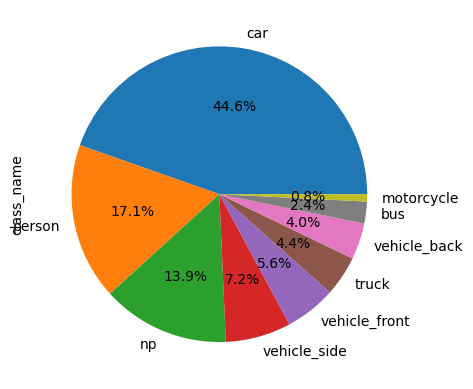

In [118]:
df = pd.read_csv(csv_name)
ax = df['class_name'].value_counts().plot(kind = 'pie',autopct='%1.1f%%',subplots=True)
ax.legend()

In [279]:
len(df['Class_type'].unique())

2

In [160]:
df['Aspect_ratio'] = (df['y2']-df['y1'])/(df['x2'] - df['x1'])

In [161]:
df.groupby('class_name')['Aspect_ratio'].mean()

class_name
bus              1.132387
car              0.873300
motorcycle       1.701330
np               0.466608
person           2.389184
truck            0.683540
vehicle_back     0.943986
vehicle_front    0.781462
vehicle_side     0.604219
Name: Aspect_ratio, dtype: float64

AttributeError: 'BarContainer' object has no attribute 'bar_label'

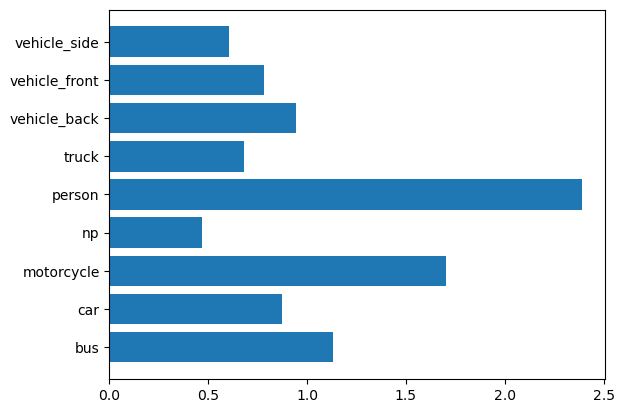

In [174]:
fig = plt.barh(df.groupby('class_name')['Aspect_ratio'].mean().index,df.groupby('class_name')['Aspect_ratio'].mean())
fig.bar_label(fig.containers[0], label_type='edge')
plt.show()

<AxesSubplot:title={'center':'Aspect_ratio'}, xlabel='class_name'>

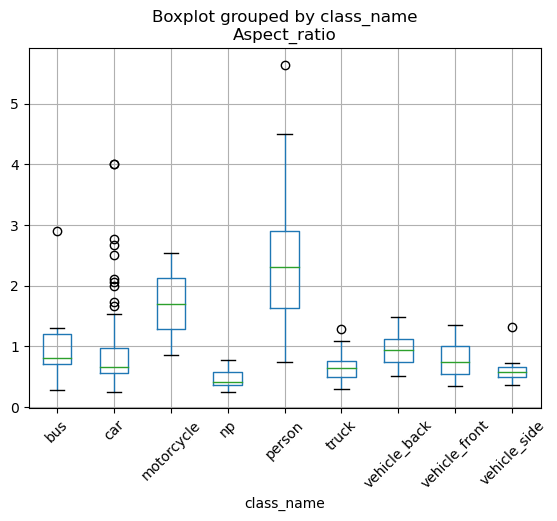

In [224]:
df.boxplot(column=['Aspect_ratio'],by='class_name',rot=45)

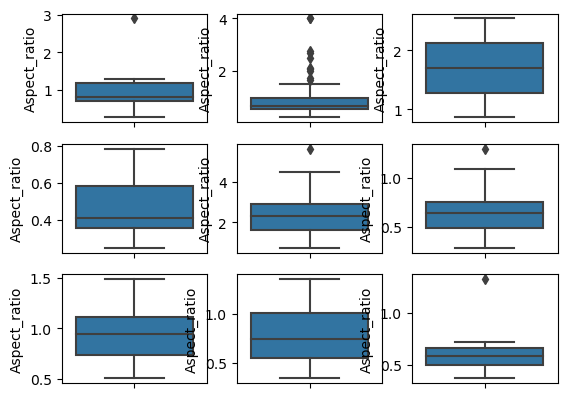

In [250]:
i = 0
for grp_name, df_grp in df.groupby('class_name'):
    i = i+1
    plt.subplot(3,3,i)
    sns.boxplot(y=df_grp['Aspect_ratio'])

[Text(15, 0, '1.13239'),
 Text(15, 0, '0.8733'),
 Text(15, 0, '1.70133'),
 Text(15, 0, '0.466608'),
 Text(15, 0, '2.38918'),
 Text(15, 0, '0.68354'),
 Text(15, 0, '0.943986'),
 Text(15, 0, '0.781462'),
 Text(15, 0, '0.604219')]

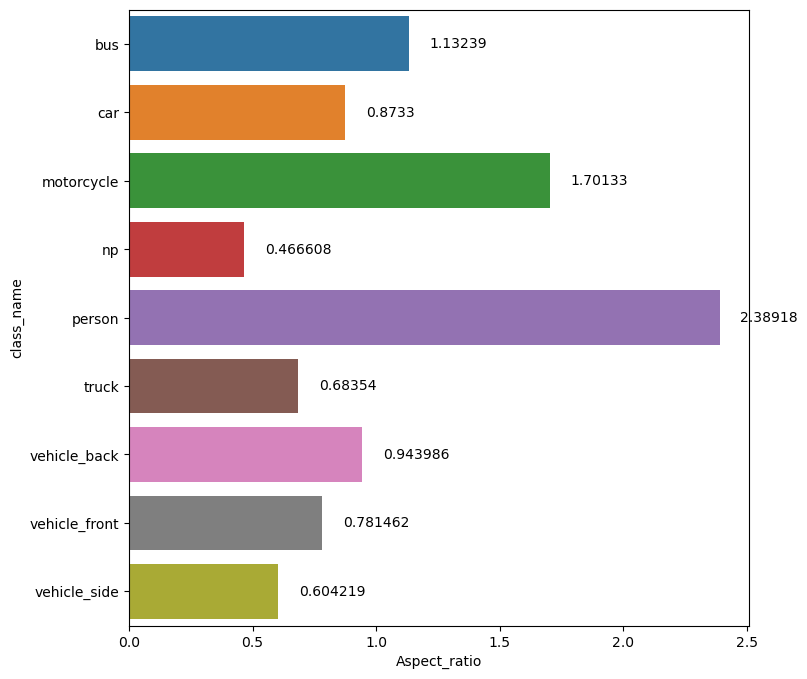

In [205]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 8))
barchart = sns.barplot(x=df.groupby('class_name')['Aspect_ratio'].mean(), y=df.groupby('class_name')['Aspect_ratio'].mean().index, ax=ax)


barchart.bar_label(ax.containers[0], label_type='edge', padding=15)
piechart = sns.piechart

In [270]:
Human_class = ['person']
Vehicle_class = ['vehicle_back','vehicle_side','vehicle_front','bicycle', 'car', 'motorcycle', 'bus', 'truck','vehicle','np']

In [261]:
df['Class_type'] = str(Human_class) if df['class_name'].isin(Human_class) else 'vehicle_class' 

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [274]:
df['Class_type'] = df['class_name'].apply(lambda x: 'Human_Class' if x in Human_class else ('Vehicle_class' if x in Vehicle_class else 'New_class'))

In [275]:
df

,filename,width,height,class_name,x1,y1,x2,y2,class_confidence,Aspect_ratio,Class_type
0,00000111.jpg,701,434,vehicle_side,200,147,660,431,0.62,0.617391,Vehicle_class
1,018a011cc5a4474b.jpg,168,114,person,67,27,85,44,0.59,0.944444,Human_Class
2,018a011cc5a4474b.jpg,168,114,bus,12,5,160,107,0.65,0.689189,Vehicle_class
3,033780299bf24555.jpg,125,90,car,76,15,125,90,0.53,1.530612,Vehicle_class
4,0350da0bd557c9da2.jpg,209,151,car,13,11,206,142,0.70,0.678756,Vehicle_class
...,...,...,...,...,...,...,...,...,...,...,...
246,VID_20220212_103154 082.jpg,506,262,car,7,16,482,252,0.80,0.496842,Vehicle_class
247,VID_20220212_103154 082.jpg,506,262,vehicle_back,8,9,207,254,0.86,1.231156,Vehicle_class
248,VID_20220212_103843 63.jpg,367,250,truck,14,15,362,247,0.53,0.666667,Vehicle_class
249,VID_20220212_103843 64.jpg,125,95,car,3,6,114,87,0.51,0.729730,Vehicle_class


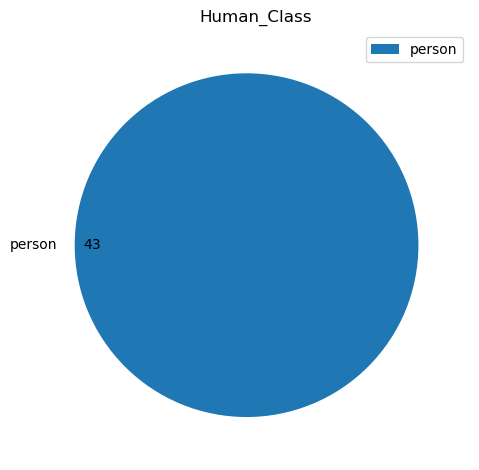

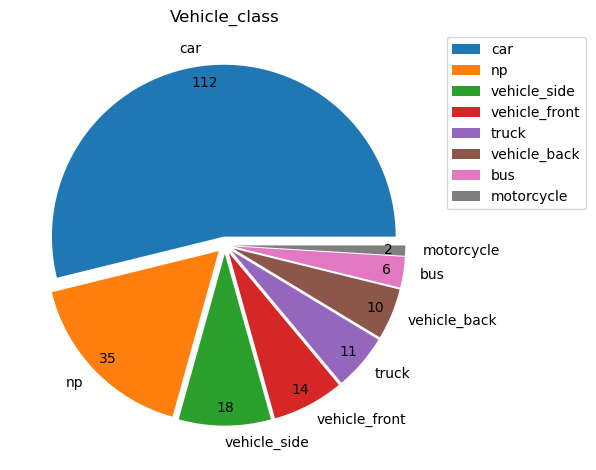

In [293]:
import matplotlib.pyplot as plt
for grp_name,df_grp in df.groupby('Class_type'):
    df2 = df_grp['class_name'].value_counts()
    explode = [0.05]*len(df2.index)
    def fmt(x):
        return '{:.0f}'.format(df2.values.sum()*x/100)
    plt.pie(df2,labels=df2.index,explode = explode,pctdistance=0.9, labeldistance=1.1,autopct=fmt)
    plt.legend(bbox_to_anchor=(1.0, 1.0),loc=0)
    plt.title(grp_name)
    plt.tight_layout()
    plt.show()

AttributeError: 'NoneType' object has no attribute 'dpi_scale_trans'

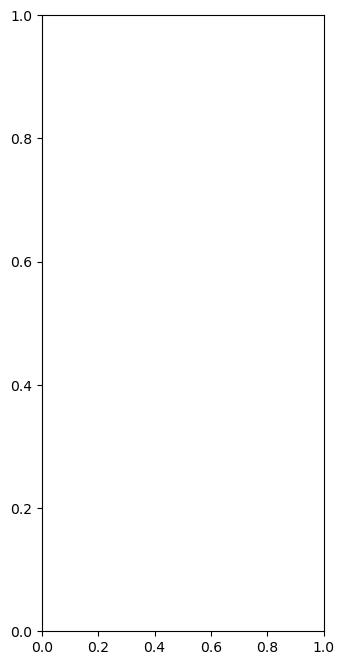

In [212]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.subplot(121)
barchart = sns.barplot(x=df.groupby('class_name')['Aspect_ratio'].mean(), y=df.groupby('class_name')['Aspect_ratio'].mean().index, ax=ax)


barchart.bar_label(ax.containers[0], label_type='edge', padding=15)
plt.subplot(122)
df2 = df['class_name'].value_counts()
explode = [0.05]*len(df2.index)
def fmt(x):
    return '{:.0f}'.format(df2.values.sum()*x/100)
plt.pie(df2,labels=df2.index,explode = explode,pctdistance=0.9, labeldistance=1.1,autopct=fmt)
plt.legend(bbox_to_anchor=(1.5, 1.0),loc=1)

In [67]:
df = pd.read_csv(csv_name)
folder_name  = os.path.dirname(csv_name)
save_path = csv_name.split('.')[0]
if not os.path.exists(save_path):
    os.mkdir(save_path)


In [14]:
df.groupby('class_name')

KeyError: 'Column not found: 0'

In [68]:
df = df.applymap(str)

In [ ]:
df['class_name'].value_counts()

In [76]:
a = ['car']

In [77]:
df = df[df['class_name'].isin(a)]

In [78]:
df['class_name'].value_counts()

car    112
Name: class_name, dtype: int64

In [79]:
from tqdm import tqdm
for file_name, df_group in tqdm(df.groupby('filename')):
    root = Element('annotation')
    SubElement(root, 'folder').text = folder_name
    SubElement(root, 'filename').text = file_name
    SubElement(root, 'path').text = './images' + file_name
    source = SubElement(root, 'source')
    SubElement(source, 'database').text = 'Unknown'
    
    size = SubElement(root, 'size')
    SubElement(size, 'width').text = df_group['width'].unique()[0]
    SubElement(size, 'height').text = df_group['height'].unique()[0]
    SubElement(size, 'depth').text = '3'

    SubElement(root, 'segmented').text = '0'
    
    for index, row in df_group.iterrows():
        obj = SubElement(root, 'object')
        SubElement(obj, 'name').text = row['class_name']
        SubElement(obj, 'pose').text = 'Unspecified'
        SubElement(obj, 'truncated').text = '0'
        SubElement(obj, 'difficult').text = '0'

        bbox = SubElement(obj, 'bndbox')
        SubElement(bbox, 'xmin').text = row['x1']
        SubElement(bbox, 'ymin').text = row['x2']
        SubElement(bbox, 'xmax').text = row['y1']
        SubElement(bbox, 'ymax').text = row['y2']
    tree = ElementTree(root)    
    xml_filename = os.path.join(save_path, os.path.splitext(file_name)[0] + '.xml')
    tree.write(xml_filename)

100%|█████████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<00:00, 524.37it/s]


In [ ]:
filename	width	height	class_name	x1	y1	x2	y2	class_confidence



In [20]:
from collections import defaultdict
import os
import csv

from xml.etree.ElementTree import parse, Element, SubElement, ElementTree
import xml.etree.ElementTree as ET

csv_file = 'D://vehicle_data//front_images//merged_output.csv'
class_need = ['bus','car']
folder_name  = os.path.dirname(csv_name)
save_path = csv_name.split('.')[0]

if not os.path.exists(save_path):
    os.mkdir(save_path)


def write_xml(folder, filename, bbox_list):
    root = Element('annotation')
    SubElement(root, 'folder').text = folder
    SubElement(root, 'filename').text = filename
    SubElement(root, 'path').text = './images' + filename
    source = SubElement(root, 'source')
    SubElement(source, 'database').text = 'Unknown'

    size = SubElement(root, 'size')
    SubElement(size, 'width').text = e_width
    SubElement(size, 'height').text = e_height
    SubElement(size, 'depth').text = '3'

    SubElement(root, 'segmented').text = '0'

    for entry in bbox_list:
        e_filename, e_width, e_height, e_class_name, e_xmin, e_ymin, e_xmax, e_ymax, e_confidence = entry

        obj = SubElement(root, 'object')
        SubElement(obj, 'name').text = e_class_name
        SubElement(obj, 'pose').text = 'Unspecified'
        SubElement(obj, 'truncated').text = '0'
        SubElement(obj, 'difficult').text = '0'

        bbox = SubElement(obj, 'bndbox')
        SubElement(bbox, 'xmin').text = e_xmin
        SubElement(bbox, 'ymin').text = e_ymin
        SubElement(bbox, 'xmax').text = e_xmax
        SubElement(bbox, 'ymax').text = e_ymax

    # indent(root)
    tree = ElementTree(root)

    xml_filename = os.path.join('.', folder, os.path.splitext(filename)[0] + '.xml')
    tree.write(xml_filename)


entries_by_filename = defaultdict(list)

with open(csv_file, 'r', encoding='utf-8') as f_input_csv:
    csv_input = csv.reader(f_input_csv)
    header = next(csv_input)
    for row in csv_input:
        filename, width, height, class_name, xmin, ymin, xmax, ymax, class_confidence = row
        if class_name in class_need:
            entries_by_filename[filename].append(row)

for filename, entries in entries_by_filename.items():
    write_xml(save_path, filename, entries)

UnboundLocalError: local variable 'e_width' referenced before assignment

In [240]:
import bagpy
from bagpy import bagreader

b = bagreader('C:/Users/SumeetMitra/Downloads/highway1.bag')

[INFO]  Successfully created the data folder C:/Users/SumeetMitra/Downloads/highway1.


In [241]:
print(b.topic_table)

             Topics                Types  Message Count  Frequency
0  /dvs/cam1/events  dvs_msgs/EventArray          11030  90.895978


In [254]:
print(dir(b))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'animate_laser', 'animate_pointcloud', 'bagfile', 'clock_data', 'compressed_images', 'datafolder', 'delimiter', 'dir', 'end_time', 'filename', 'frequency', 'laser_data', 'message_by_topic', 'message_types', 'n_messages', 'odometry_data', 'plot_odometry', 'plot_std', 'plot_vel', 'plot_wrench', 'pointcloud_data', 'reader', 'start_time', 'std_data', 'topic_table', 'topic_tuple', 'topics', 'vel_data', 'verbose', 'wrench_data']


In [258]:
# LASER_MSG = b.message_by_topic('/dvs/cam1/events')
# df_laser = pd.read_csv(LASER_MSG)
# df_laser

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\SumeetMitra\AppData\Local\Temp\ipykernel_5132\4220664988.py", line 1, in <module>
    LASER_MSG = b.message_by_topic('/dvs/cam1/events')
  File "C:\Users\SumeetMitra\AppData\Roaming\Python\Python39\site-packages\bagpy\bagreader.py", line 270, in message_by_topic
    for topic, msg, t in self.reader.read_messages(topics=topic, start_time=tstart, end_time=tend):
  File "C:\Users\SumeetMitra\AppData\Roaming\Python\Python39\site-packages\rosbag\bag.py", line 2705, in read_messages
    yield self.seek_and_read_message_data_record((entry.chunk_pos, entry.offset), raw, return_connection_header)
  File "C:\Users\SumeetMitra\AppData\Roaming\Python\Python39\site-packages\rosbag\bag.py", line 2880, in seek_and_read_message_data_record
    msg.deserialize(data)
  File "C:\Users\SUMEET~1

TypeError: object of type 'NoneType' has no len()

In [256]:
b.message_types()

TypeError: 'list' object is not callable

In [259]:
df_laser

NameError: name 'df_laser' is not defined